In [1]:
import pytesseract
import numpy as np
from matplotlib import pyplot as plt
import imageio
import cv2 # OpenCV

# Mostrando a imagem com opencv
Mostra tbm como resolver o crash que geralmente acontece no jupyter

In [2]:
img = cv2.imread("./Imagens/teste01.jpg")
cv2.imshow('img',img) #formato BGR
cv2.waitKey(0)
cv2.destroyAllWindows()

Porém, nesse caso, é mais fácil usar o pyplot pra mostrar a img direto aqui:

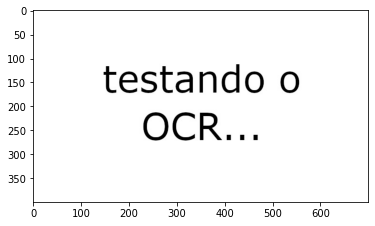

In [3]:
plt.imshow(img)
plt.show()

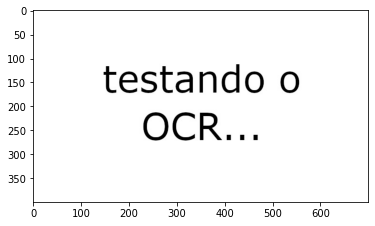

In [4]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb) # não muda nada nessa imagem
plt.show()

In [5]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'
texto = pytesseract.image_to_string(rgb)
print(texto)

testando o
OCR...



<function matplotlib.pyplot.show(close=None, block=None)>

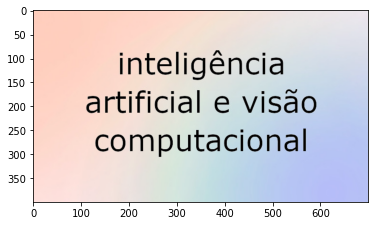

In [6]:
img = cv2.imread("./Imagens/teste02.jpg")
plt.imshow(img)
plt.show

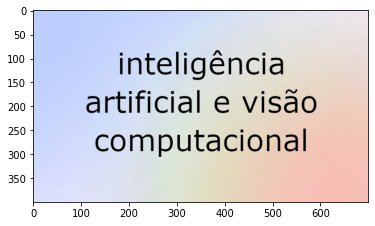

In [7]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [8]:
texto = pytesseract.image_to_string(rgb)
print(texto)

inteligéncia
artificial e visao
computacional



In [9]:
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (3):
eng
osd
por


In [10]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

inteligência
artificial e visão
computacional



# PSM

In [11]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


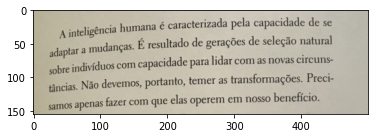

In [12]:
img = cv2.imread('Imagens/trecho-livro.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [13]:
config = '--psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config)
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [14]:
texto = pytesseract.image_to_string(rgb, lang='por')
print(texto)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
portanto, temer as transformações. Preci-

tâncias. Não devemos,
samos apenas fazer com que elas operem em nosso benefício.



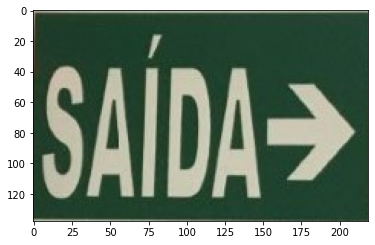

In [15]:
img = cv2.imread('Imagens/saida.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [16]:
config = '--psm 6'
texto = pytesseract.image_to_string(rgb, lang='por', config=config)
print(texto)

SAÍDA>



# OSD

In [17]:
from PIL import Image

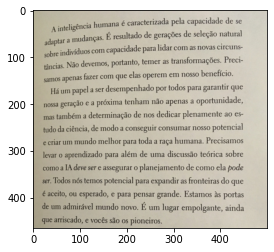

In [18]:
img = Image.open('Imagens/livro01.jpg')
plt.imshow(img)
plt.show()


In [19]:
#print(pytesseract.image_to_osd(img, config="--dpi 300"))

# Seleção de textos

In [20]:
from pytesseract import Output

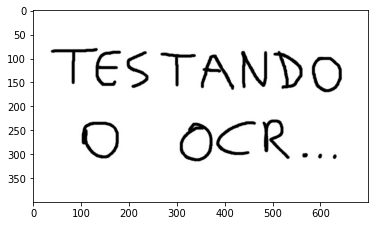

In [21]:
img = cv2.imread('Imagens/teste_manuscrito_01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [22]:
resultado = pytesseract.image_to_data(rgb, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2],
 'left': [0, 38, 38, 38, 38, 102, 102, 307],
 'top': [0, 79, 79, 79, 79, 228, 233, 228],
 'width': [700, 607, 607, 607, 607, 532, 77, 327],
 'height': [400, 236, 236, 92, 92, 87, 76, 87],
 'conf': ['-1', '-1', '-1', '-1', '90.214363', '-1', '77.749153', '61.677670'],
 'text': ['', '', '', '', 'TESTANDO', '', 'O', 'OCR...']}

In [23]:
# min_conf  = 40 #@param {type:'slider', min: 0, max: 100}
import ipywidgets as widgets
min_conf = widgets.IntSlider(
    min=0,
    max=100,
    step=1,
    description='min_conf:',
    value=40
)
min_conf

IntSlider(value=40, description='min_conf:')

In [24]:
def caixa_texto (resultado, img, cor=(0,255,0), tam_fonte=2):
    x = resultado['left'][i]
    y = resultado['top'][i]
    w = resultado['width'][i]
    h = resultado['height'][i]
    
    cv2.rectangle(img, (x,y),(x + w ,y + h), cor, tam_fonte)
    # proto_ROI = img[y:y+h, x:x+w]
    
    return x, y, img
    

Coord 4: x [38], y [79]
Coord 6: x [102], y [233]
Coord 7: x [307], y [228]


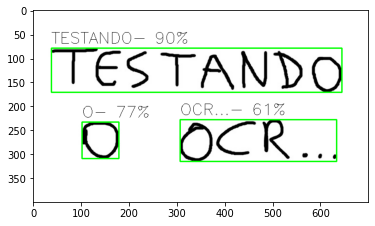

In [25]:
img_copia = rgb.copy()
for i in range (0, len(resultado['text'])):
    confiança = float(resultado['conf'][i])
    if int(confiança) > min_conf.value:
        x,y,img = caixa_texto(resultado, img_copia)
        print(f'Coord {i}: x [{x}], y [{y}]')
        texto = resultado['text'][i] + '- '+ str(int(float(resultado['conf'][i]))) + '%'
        cv2.putText(img_copia, texto,(x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0, 0, 0))
cv2.imshow('img',img_copia) #formato BGR
plt.imshow(img_copia)
cv2.waitKey(0)
plt.show()
cv2.destroyAllWindows()

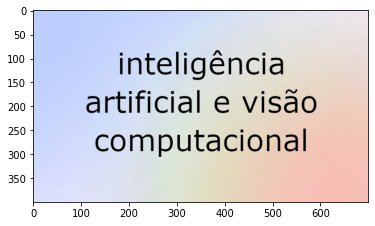

In [26]:
img = cv2.imread('Imagens/teste02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [27]:
resultado = pytesseract.image_to_data(rgb, lang='por', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  '91.025169',
  '-1',
  '88.661224',
  '93.279518',
  '91.456238',
  '-1',
  '90.339569'],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [28]:
from PIL import ImageFont, Image,ImageDraw
fonte = 'Fontes/calibri.ttf'

In [29]:
def escreve_texto(texto,x,y,img,fonte,tamanho_texto=18):
    fonte = ImageFont.truetype(fonte,tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x,y-tamanho_texto), texto, font = fonte)
    img = np.array(img_pil)
    return img

Coord 4: x [182], y [84]
Coord 6: x [111], y [167]
Coord 7: x [380], y [179]
Coord 8: x [437], y [165]
Coord 10: x [130], y [247]


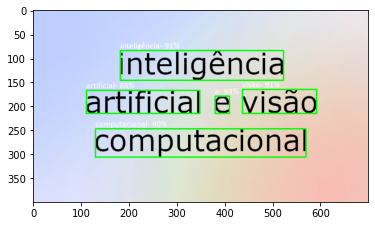

In [30]:
img_copia = rgb.copy()
for i in range (0, len(resultado['text'])):
    confiança = float(resultado['conf'][i])
    if int(confiança) > min_conf.value:
        x,y,img = caixa_texto(resultado, img_copia)
        print(f'Coord {i}: x [{x}], y [{y}]')
        texto = resultado['text'][i] + '- '+ str(int(float(resultado['conf'][i]))) + '%'
        img_copia = escreve_texto(texto,x,y,img_copia, fonte)
        #cv2.putText(img_copia, texto,(x, y-10), cv2.FONT_ARIAL, 0.35, (0, 0, 0))
cv2.imshow('img',img_copia) #formato BGR
plt.imshow(img_copia)
cv2.waitKey(0)
plt.show()
cv2.destroyAllWindows()

# Busca de informações específicas

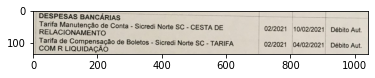

In [31]:
import re # regular expressions
img = cv2.imread('Imagens/tabela_teste.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [32]:
resultado = pytesseract.image_to_data(rgb, lang='por', output_type=Output.DICT)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [33]:
# https://regexr.com/
padrao_data = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

Coord 21: x [811], y [51]
Coord 39: x [809], y [98]


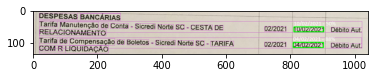

data 1: 10/02/2021
data 2: 04/02/2021
resultado 1: 10/02/2021 - 50%
resultado 2: 04/02/2021 - 88%


In [34]:
datas = []
resultados = []
img_copia = rgb.copy()
for i in range (0, len(resultado['text'])):
    confiança = float(resultado['conf'][i])
    if int(confiança) > min_conf.value:
         texto = resultado['text'][i]
    if re.match(padrao_data, texto):
        x,y,img = caixa_texto(resultado, img_copia)
        print(f'Coord {i}: x [{x}], y [{y}]')
        acc = resultado['conf'][i] +  '%'
        texto = resultado['text'][i] + ' - '+ str(int(float(resultado['conf'][i]))) + '%'
        data = resultado['text'][i]
        img_copia = escreve_texto(texto,x,y,img_copia, fonte)
        datas.append(data)
        resultados.append(texto)
    else:
       x,y,img_copia = caixa_texto(resultado, img_copia, cor=(200,100,200), tam_fonte=1)

cv2.imshow('img',img_copia) #formato BGR
plt.imshow(img_copia)
cv2.waitKey(0)
plt.show()
cv2.destroyAllWindows()
count = 1
for i in datas:
    print(f'data {count}: {i}')
    count +=1
count = 1
for i in resultados:
    print(f'resultado {count}: {i}')
    count +=1

# Cenários naturais

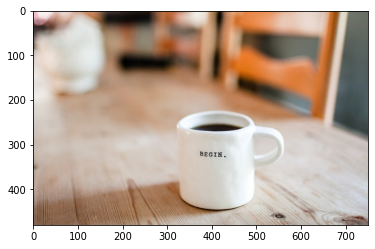

In [35]:
img = cv2.imread('Imagens/caneca.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow('img',rgb) #formato BGR
plt.imshow(rgb)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
resultado = pytesseract.image_to_data(rgb, lang='eng', output_type=Output.DICT)
resultado

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
 'left': [0, 668, 668, 668, 668, 374, 374, 374, 374, 0, 0, 0, 0],
 'top': [0, 0, 0, 0, 0, 316, 316, 316, 316, 409, 409, 409, 409],
 'width': [750, 82, 82, 82, 82, 58, 58, 58, 58, 169, 169, 169, 169],
 'height': [480, 295, 295, 295, 295, 13, 13, 13, 13, 71, 71, 71, 71],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  '95.000000',
  '-1',
  '-1',
  '-1',
  '74.108917',
  '-1',
  '-1',
  '-1',
  '95.000000'],
 'text': ['', '', '', '', ' ', '', '', '', 'BEGIN.', '', '', '', '']}

Coord 8: x [374], y [316]


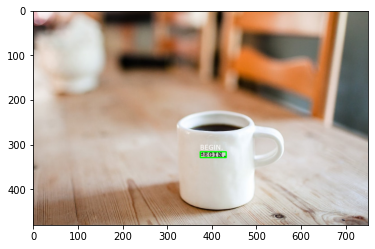

In [37]:
img_copia = rgb.copy()
for i in range (0, len(resultado['text'])):
    confiança = float(resultado['conf'][i])
    if int(confiança) > min_conf.value:
        texto = resultado['text'][i]
        if not texto.isspace() and len(texto) > 1:
            x,y,img = caixa_texto(resultado, img_copia)
            print(f'Coord {i}: x [{x}], y [{y}]')
            img_copia = escreve_texto(texto,x,y,img_copia, fonte)
            #cv2.putText(img_copia, texto,(x, y-10), cv2.FONT_ARIAL, 0.35, (0, 0, 0))
cv2.imshow('img',img_copia) #formato BGR
plt.imshow(img_copia)
cv2.waitKey(0)
plt.show()
cv2.destroyAllWindows()